<a href="https://colab.research.google.com/github/Hamza-t/Linear-Regression/blob/main/Linear_Regression_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello everyone , here i'm beginning my journey in regression algorithms ! Hope that u find this notebook useful** 

Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:
* Linear Regression
* Robust Regression
* Ridge Regression
* LASSO Regression
* Bayesian Regression
* Poisson Regression
* Elastic Net
* Polynomial Regression
* Stochastic Gradient Descent


##Linear Regression

Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.

###Implementation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


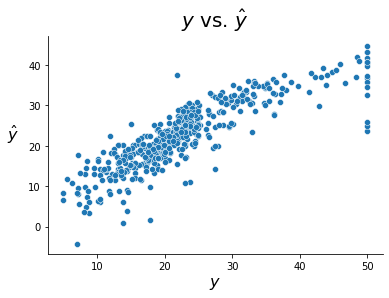

In [ ]:
# With Scikit-Learn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train);
sklearn_predictions = sklearn_model.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(y_train, sklearn_predictions)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

In [ ]:
# With Statsmodels
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
sm_model1 = sm.OLS(y_train, X_train_with_constant)
sm_fit1 = sm_model1.fit()
sm_predictions1 = sm_fit1.predict(X_train_with_constant)


##Robust Regression

Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.

A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

Random Sample Consensus - RANSAC
Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

###Implementation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


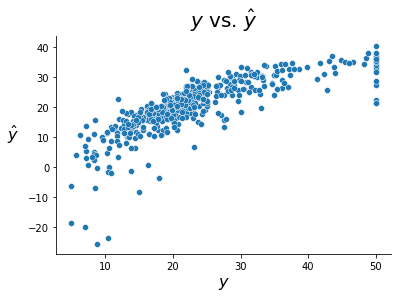

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)
robust_pred = model.predict(X_train)

#viz
fig, ax = plt.subplots()
sns.scatterplot(y_train, robust_pred)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()

##Ridge Regression

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares.
 
α>=0  is a complexity parameter that controls the amount of shrinkage: the larger the value of  α , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

###Implementation

In [ ]:
from sklearn.linear_model import Ridge
alpha = 1

# Ridge
ridge_model = Ridge(alpha = alpha)
ridge_model.fit(X_train, y_train)

# In practice, however, we want to choose alpha through cross validation. 
# This is easily implemented in scikit-learn by designating a set of alpha values to try and fitting the model with RidgeCV or LassoCV.

from sklearn.linear_model import RidgeCV
alphas = [0.01, 1, 100]

# Ridge
ridgeCV_model = RidgeCV(alphas = alphas)
ridgeCV_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-02, 1.e+00, 1.e+02]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

##LASSO Regression

A linear model that estimates sparse coefficients.
Mathematically, it consists of a linear model trained with  ℓ1  prior as regularizer. 
The lasso estimate thus solves the minimization of the least-squares penalty with  α∣∣∣∣w∣∣∣∣1  added, where  α  is a constant and  ∣∣∣∣w∣∣∣∣1  is the  ℓ1−norm  of the parameter vector.

In [ ]:
from sklearn.linear_model import  Lasso
alpha = 1
# Lasso
lasso_model = Lasso(alpha = alpha)
lasso_model.fit(X_train, y_train)

# in practice 
from sklearn.linear_model import  LassoCV
alphas = [0.01, 1, 100]

# Lasso
lassoCV_model = LassoCV(alphas = alphas)
lassoCV_model.fit(X_train, y_train);